In [2]:
#import libraries
import rasterio # the GEOS-based raster package
import numpy # the array computation library
import geopandas # the GEOS-based vector package
import contextily # the package for fetching basemaps
import matplotlib.pyplot as plt # the visualization package

In [5]:
#import Philadelphia aerial photo data
philly_tile = geopandas.read_file('Resources/PhiladelphiaImagery_TileIndex2022')

In [9]:
from rasterio.features import rasterize
from rasterio.transform import from_bounds
import numpy as np

def vector_to_raster(gdf, output_tiff, resolution=10):
    """
    Converts a GeoDataFrame of aerial photography tiles into a GeoTIFF raster file.
    
    Parameters:
    - gdf: GeoDataFrame containing polygon geometries
    - output_tiff: Path to save the rasterized TIFF file
    - resolution: Pixel resolution (smaller = higher resolution)
    """
    # Get the bounds of the dataset
    minx, miny, maxx, maxy = gdf.total_bounds
    
    # Define the number of rows and columns based on resolution
    width = int((maxx - minx) / resolution)
    height = int((maxy - miny) / resolution)
    
    # Define the transform (georeferencing) for the raster
    transform = from_bounds(minx, miny, maxx, maxy, width, height)
    
    # Convert geometries to raster format
    shapes = [(geom, 1) for geom in gdf.geometry]  # Assign all shapes a value of 1
    raster = rasterize(shapes, out_shape=(height, width), transform=transform, fill=0)
    
    # Save the raster as a GeoTIFF
    with rasterio.open(
        output_tiff,
        'w',
        driver='GTiff',
        height=height,
        width=width,
        count=1,  # Single-band raster
        dtype=raster.dtype,
        crs=gdf.crs,  # Use the same CRS as the original dataset
        transform=transform
    ) as dst:
        dst.write(raster, 1)

vector_to_raster(philly_tile, "Resources/philly_tile.tif", resolution=10)  # Save as raster

In [12]:
philly_tile_tif = rasterio.open('Resources/philly_tile.tif')

In [18]:
with rasterio.open('Resources/philly_tile.tif') as src:
    raster_data = src.read(1)

print(raster_data.dtype)

int64


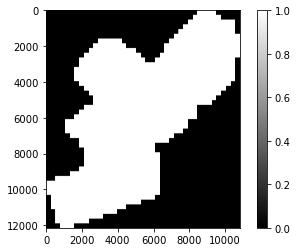

In [19]:
plt.imshow(raster_data, cmap="gray")
plt.colorbar()
plt.show()

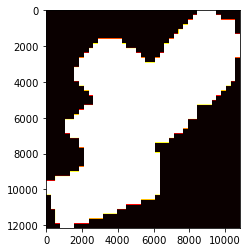

<AxesSubplot:>

In [20]:
from rasterio import plot as rioplot

rioplot.show(raster_data, cmap='hot')